<a href="https://www.kaggle.com/code/hli111111/sklearn-in-pytorch-with-gpu?scriptVersionId=161849543" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
! pip install sk_in_torch==0.0.3 #this is my package here

  Obtaining dependency information for sk_in_torch==0.0.3 from https://files.pythonhosted.org/packages/6c/e9/230357ec407ea8dacba7917f6c296ce6a21b5480b45e6df840a42d9281be/sk_in_torch-0.0.3-py3-none-any.whl.metadata


In [2]:
!pip install /kaggle/input/tabular-local-prediction-pkgs/linear_tree-0.3.5-py3-none-any.whl --no-deps

Processing /kaggle/input/tabular-local-prediction-pkgs/linear_tree-0.3.5-py3-none-any.whl


Showcase that: it can work with gpu using only torch
it can fit using sgd or matrix mode for lots of sklearn functionalities and extend the NN functions to support any sequential NN from torch.
it supports batch size for large ds and can accelerate
it has attributes mimicking sklearn so can **be called from other packages relying on sklearn's ecosystem**, e.g. this "linear_tree"


In [3]:
import torch
import sk_in_torch
from sk_in_torch.linear_model import *
from sk_in_torch.neighbors import *
from sk_in_torch.neural_network import *

# Sklearn models rewritten in pytorch to use GPU

Hao Li

This code is experimental and has to go through some checking before making a package.

This is done because: installation of pytorch is everywhere
Why not use torch to compute some of the traditional models as well? 
Also, it is possible to make torch conform to sklearn's grammar, making it almost plug and play.
Here are some of the results
& I show you that sklearn and packages in sklearn style (like linear-tree) can work with these functions seamlessly.

I am looking for some comments on the code (and if you can help check code correctness etc.)
This is on GitHub at 
github.com/HaoLi111/ML_Biostats/sklearn-in-pytorch-with-gpu.ipynb



# Start with linear models

TorchMatrixBasedLinearRegression is for directly solving matrix for OLS


others are to use an optimizer (and can adjust batch size if there is too many features).

In [4]:
from sklearn.datasets import make_regression

# Generate dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10)


# Initialize and train TorchLinearRegression
linear_model = TorchElasticNet(device='cuda')
linear_model.fit(X, y, batch_size=10)

# Make predictions
linear_predictions = linear_model.predict(X)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


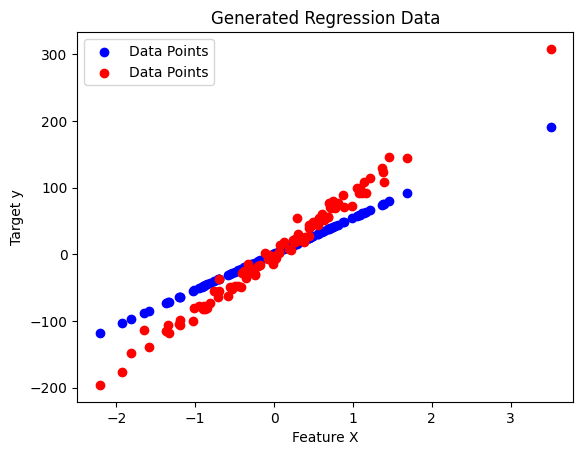

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Plotting the generated data
plt.scatter(X[:,0], linear_predictions, color='blue', label='Data Points')

plt.scatter(X[:,0], y, color='red', label='Data Points')
plt.title('Generated Regression Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()


In [6]:
model = TorchLinearRegression(device='cuda')  # or device='cuda' if you prefer and if it's available
model.fit(X, y)

In [7]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, n_clusters_per_class=1, random_state=0)


# Assuming you have a dataset X, y where y are class labels
classifier = TorchSGDClassifier(device='cuda' if torch.cuda.is_available() else 'cpu')
classifier.fit(X, y, batch_size=10)

# Predictions
predictions = classifier.predict(X)


In [8]:
# !pip install linear-tree

## model within model: model can be called with other fns like sklearn's gridsearch, linear-tree and you name it

In [9]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1,
                       n_informative=2, n_targets=1,
                       random_state=0, shuffle=False,
                       noise = 20)
regr = LinearTreeRegressor(base_estimator=TorchMatrixBasedLinearRegression(device='cuda'))
regr.fit(X, y)

LinearTreeRegressor(base_estimator=<sk_in_torch.linear_model.TorchMatrixBasedLinearRegression object at 0x7af9b40f1f00>)

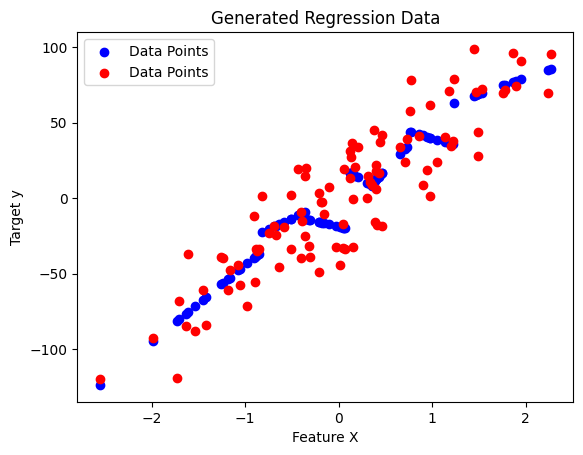

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Plotting the generated data
plt.scatter(X[:,0], regr.predict(X), color='blue', label='Data Points')

plt.scatter(X[:,0], y, color='red', label='Data Points')
plt.title('Generated Regression Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=4,
                       n_informative=2, n_targets=1,
                       random_state=0, shuffle=False)
regr = LinearTreeRegressor(base_estimator=TorchElasticNet(device = 'cuda', alpha = .2))
regr.fit(X, y)

LinearTreeRegressor(base_estimator=<sk_in_torch.linear_model.TorchElasticNet object at 0x7af8f44de470>)

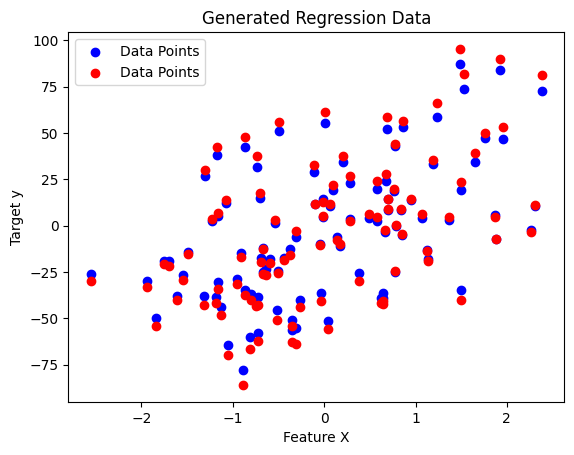

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Plotting the generated data
plt.scatter(X[:,0], regr.predict(X), color='blue', label='Data Points')

plt.scatter(X[:,0], y, color='red', label='Data Points')
plt.title('Generated Regression Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()

In [13]:
from sklearn.datasets import make_regression

# Generate dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10)


# Initialize and train TorchLinearRegression
linear_model = TorchLinearRegressionNN(device='cuda', )
linear_model.fit(X, y, )

# Make predictions
linear_predictions = linear_model.predict(X)


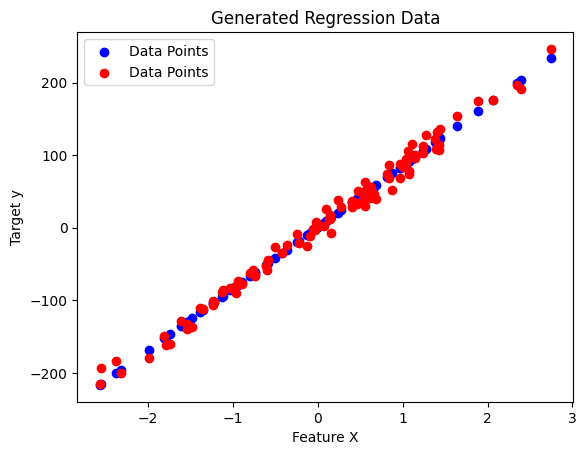

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Plotting the generated data
plt.scatter(X[:,0], linear_predictions, color='blue', label='Data Points')

plt.scatter(X[:,0], y, color='red', label='Data Points')
plt.title('Generated Regression Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()

In [15]:
# Assuming you have a dataset X, y for a binary classification task
n_features = X.shape[1]
model = LogisticRegressionNN(n_features, device='cuda' if torch.cuda.is_available() else 'cpu')
model.fit(X, y, n_iter=1000, learning_rate=0.01, batch_size=32)

# Predictions
predictions = model.predict(X)


In [16]:
model.coef_

array([66.21446], dtype=float32)

# Sequential forward NNs

In [17]:
# Assuming you have a dataset X, y for training and X_test, y_test for testing
model = TabularMLP(input_features=1, output_features=1, layers=[1,2,2], device='cuda' if torch.cuda.is_available() else 'cpu')
model.fit(X, y, n_iter=1000, learning_rate=0.01, batch_size=32)#, X_test=X_test, y_test=y_test)

# Access the loss history
train_loss_history = model.train_loss_history
test_loss_history = model.test_loss_history

# Predictions
predictions = model.predict(X)


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [18]:
model = TorchEvalTabularMLP(
    layers=[
        nn.Linear(1, 8), 
        nn.ReLU(), 
        nn.Linear(8, 1),
    ],
    # task_type='regression',
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

model.fit(X, y, n_iter=1000, learning_rate=0.01, batch_size=32)#, X_test=X_test, y_test=y_test)

# Access the loss history
train_loss_history = model.train_loss_history
test_loss_history = model.test_loss_history

# Predictions
predictions = model.predict(X)
# predictions

In [19]:
# !pip install safeeval

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

class RBFKernelSVM(nn.Module):
    def __init__(self, gamma, device='cpu'):
        super(RBFKernelSVM, self).__init__()
        self.gamma = gamma
        self.device = device
        self.to(device)

    def rbf_kernel(self, X1, X2):
        # Calculate the RBF kernel between each pair of points
        X1_square = torch.sum(X1 ** 2, dim=1).view(-1, 1)
        X2_square = torch.sum(X2 ** 2, dim=1).view(1, -1)
        distance = X1_square + X2_square - 2 * torch.matmul(X1, X2.t())
        return torch.exp(-self.gamma * distance)

    def forward(self, X, support_vectors, coefficients, intercept):
        # Calculate the decision function
        kernel = self.rbf_kernel(X, support_vectors)
        return torch.matmul(kernel, coefficients) + intercept

    def fit(self, X, y, lr=0.01, epochs=100, batch_size=32):
        X, y = torch.tensor(X, dtype=torch.float32).to(self.device), torch.tensor(y, dtype=torch.float32).to(self.device)
        y = 2 * y - 1  # Convert labels to -1, 1 format

        # Initialize parameters
        coefficients = torch.randn(X.size(0), requires_grad=True, device=self.device)
        intercept = torch.randn(1, requires_grad=True, device=self.device)

        optimizer = optim.SGD([coefficients, intercept], lr=lr)
        dataset = torch.utils.data.TensorDataset(X, y)
        loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

        for epoch in range(epochs):
            for X_batch, y_batch in loader:
                optimizer.zero_grad()

                # Compute hinge loss for the batch
                distances = self.forward(X_batch, X, coefficients, intercept)
                hinge_loss = torch.mean(torch.clamp(1 - y_batch * distances, min=0))

                # Add regularization term
                loss = hinge_loss + 1 / (2 * X.size(0)) * torch.sum(coefficients ** 2)

                loss.backward()
                optimizer.step()

        # Extract support vectors
        support_mask = coefficients.detach() > 1e-5
        self.support_vectors = X[support_mask]
        self.coefficients = coefficients[support_mask]
        self.intercept = intercept.detach()

# Example usage
# X, y should be PyTorch tensors
model = RBFKernelSVM(gamma=1.0, device='cuda' if torch.cuda.is_available() else 'cpu')
model.fit(X, y, lr=0.01, epochs=100, batch_size=32)


# Neighbors? KNN?

In [21]:
import torch


# Example Usage
knn_regressor = KNNRegressor(k=3, device='cuda')  # Use 'cpu' if GPU is not available
# data = [[0, 1], [1, 1], [2, 2], [3, 3]]  # Example feature data
# targets = [0.5, 1.1, 2.2, 3.3]  # Corresponding target values
# query = [[1, 0], [2, 1]]  # Points for which we want to predict the target values

knn_regressor.fit(X,y)
predictions = knn_regressor.predict(X)


In [22]:
predictions

array([   7.530561 ,   32.25215  ,   39.704712 ,   88.91634  ,
        -81.55695  ,   48.654724 ,   76.175026 ,  121.07561  ,
       -102.829575 ,  111.14406  ,   85.467575 ,   32.252148 ,
       -133.50168  ,  -63.504578 , -135.95718  ,  -28.486639 ,
       -107.22347  ,   19.846596 ,   13.445857 ,  114.13306  ,
         45.878784 , -157.16661  ,   14.482306 ,  -42.78305  ,
        187.31396  ,  -81.55696  ,  181.95251  , -191.97948  ,
         80.08748  , -157.16661  ,    2.1014256,    0.7959317,
         85.467575 ,  -51.44955  ,  -12.758858 ,    0.7959317,
         89.43609  , -196.98625  , -102.82956  ,   47.411983 ,
       -196.98625  ,   14.482306 ,  134.69489  ,  -84.40993  ,
         45.878784 ,   48.654724 ,  -63.504585 ,   47.22464  ,
        210.94891  ,  111.14404  , -163.49962  ,  -81.55696  ,
         14.352672 ,   85.467575 ,   39.704712 , -135.95718  ,
         13.445857 , -191.97948  , -102.829575 ,   44.422127 ,
        -12.758858 ,   52.275772 ,   45.878784 ,  117.3

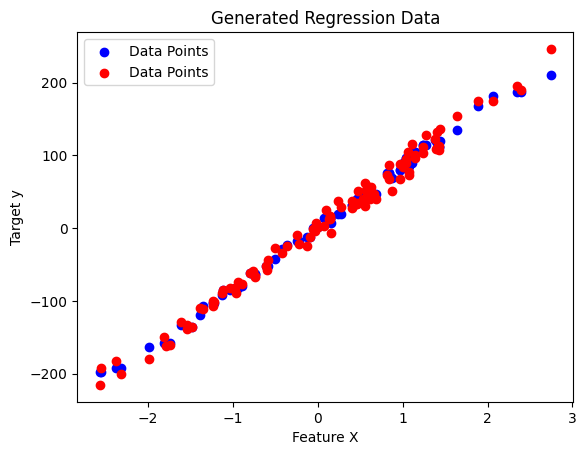

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Plotting the generated data
plt.scatter(X[:,0], predictions, color='blue', label='Data Points')

plt.scatter(X[:,0], y, color='red', label='Data Points')
plt.title('Generated Regression Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()

In [24]:
import torch

class GaussianNaiveBayes:
    def __init__(self, device='cuda'):
        self.device = device
        self.classes = None
        self.means = None
        self.vars = None
        self.priors = None

    def fit(self, X, y):
        X = torch.tensor(X, dtype=torch.float32).to(self.device)
        y = torch.tensor(y, dtype=torch.float32).to(self.device)
        self.classes = torch.unique(torch.tensor(y)).to(self.device)
        self.means = torch.zeros((len(self.classes), X.shape[1])).to(self.device)
        self.vars = torch.zeros((len(self.classes), X.shape[1])).to(self.device)
        self.priors = torch.zeros(len(self.classes)).to(self.device)

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[i, :] = X_c.mean(0)
            self.vars[i, :] = X_c.var(0)
            self.priors[i] = float(X_c.shape[0]) / X.shape[0]

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32).to(self.device)
        num_samples, num_features = X.shape
        X = torch.tensor(X, dtype=torch.float32).to(self.device)
        likelihoods = torch.zeros((num_samples, len(self.classes))).to(self.device)

        for i, c in enumerate(self.classes):
            # Apply Gaussian Naive Bayes formula
            likelihood = (
                -0.5 * torch.sum(torch.log(2 * torch.pi * self.vars[i]))
                -0.5 * torch.sum(((X - self.means[i]) ** 2) / self.vars[i], 1)
            )
            prior = torch.log(self.priors[i])
            likelihoods[:, i] = prior + likelihood

        return torch.argmax(likelihoods, 1).cpu().numpy()

# Example usage
gnb = GaussianNaiveBayes(device='cuda')  # Use 'cpu' if GPU is not available
data = [[-3, 7], [1, 5], [1, 2], [-2, 0], [2, 3], [-4, 0], [-1, 1], [1, 1], [-2, 2], [2, 7]]
labels = [3, 3, 3, 3, 4, 3, 3, 4, 3, 4]
query = [[0, 0], [2, 6]]

gnb.fit(data, labels)
predictions = gnb.predict(query)


/tmp/ipykernel_26/3009204202.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.classes = torch.unique(torch.tensor(y)).to(self.device)
/tmp/ipykernel_26/3009204202.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32).to(self.device)
